# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve

# Read Data
-------------
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [2]:
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
#                  names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
#               'oldpeak', 'slope', 'ca', 'thal', 'target'], encoding='latin-1')
# df.to_csv('cleveland.csv')

In [99]:
df = pd.read_csv('cleveland.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [100]:
df.target.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [101]:
df.target = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df.target.value_counts()

0    164
1    139
Name: target, dtype: int64

In [102]:
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [103]:
df.ca = df.ca.replace('?', 3)
df.ca = df.ca.astype('float')
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     24
Name: ca, dtype: int64

In [104]:
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [105]:
df.thal = df.thal.replace('?', 6)
df.thal = df.thal.astype('float')
df.thal.value_counts()

3.0    166
7.0    117
6.0     20
Name: thal, dtype: int64

# Exploratory Data Analysis

In [106]:
df.target.value_counts(normalize=True)

0    0.541254
1    0.458746
Name: target, dtype: float64

<AxesSubplot:>

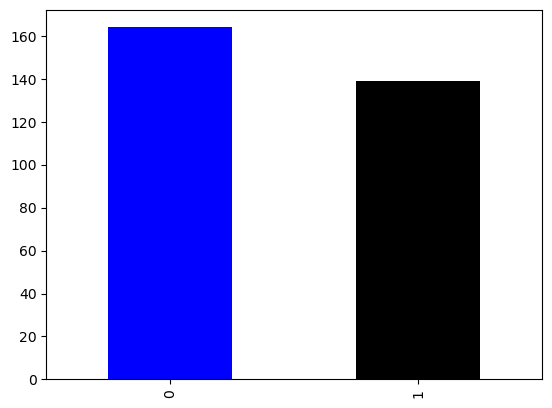

In [107]:
df.target.value_counts().plot(kind='bar', color=['blue', 'black'])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [110]:
df.sex.value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [111]:
pd.crosstab(df.target, df.sex)

sex,0.0,1.0
target,,
0,72,92
1,25,114


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

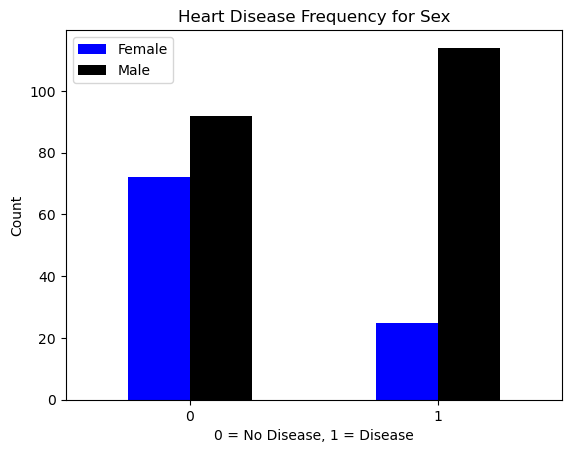

In [112]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['blue', 'black'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

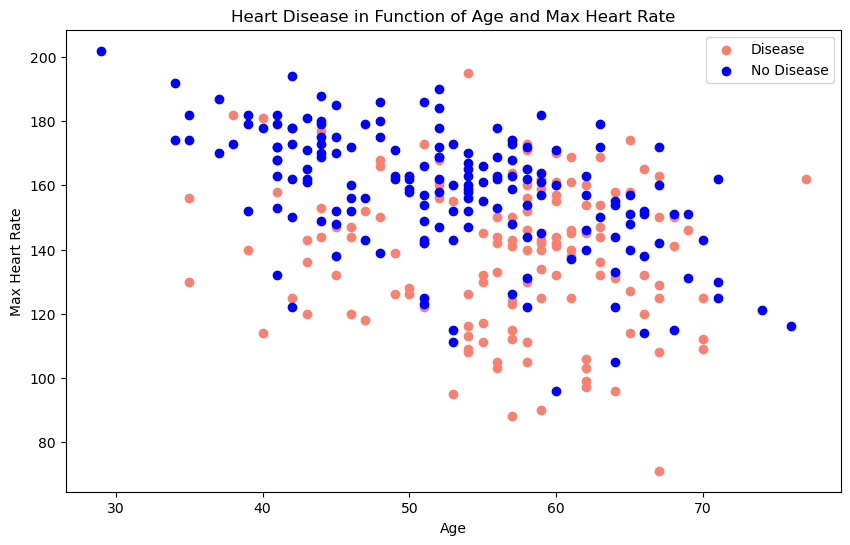

In [113]:
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='blue')
plt.title('Heart Disease in Function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

<AxesSubplot:ylabel='Frequency'>

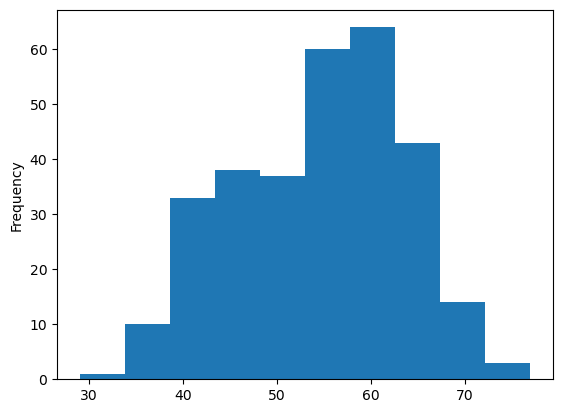

In [114]:
df.age.plot.hist()

In [115]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
1.0,16,7
2.0,41,9
3.0,68,18
4.0,39,105


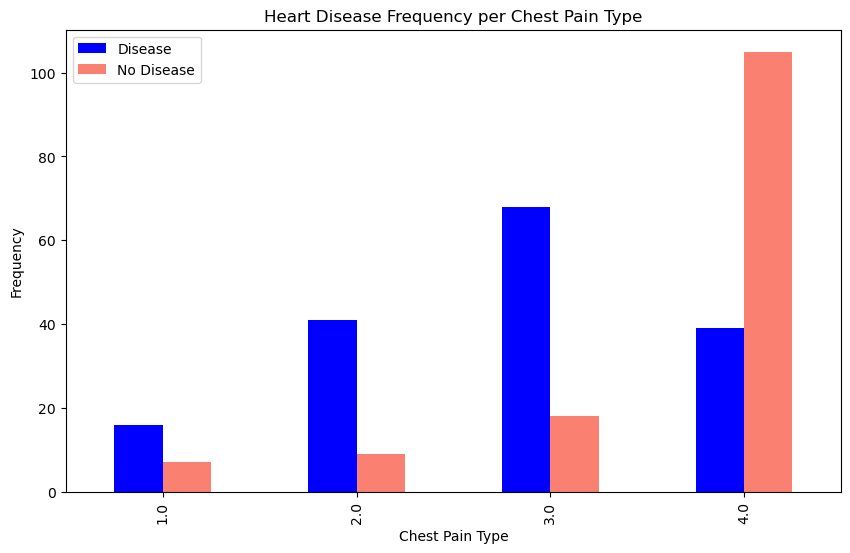

In [116]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['blue', 'salmon'])
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['Disease', 'No Disease'])

In [117]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.322093,0.126260,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.111124,0.377100,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.218137,0.266063,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097730,0.132439,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.095245,0.011101,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.147495,0.074831,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.106899,0.024458,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.242632,-0.280809,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.133952,0.329426,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.258143,0.338057,0.424510


<AxesSubplot:>

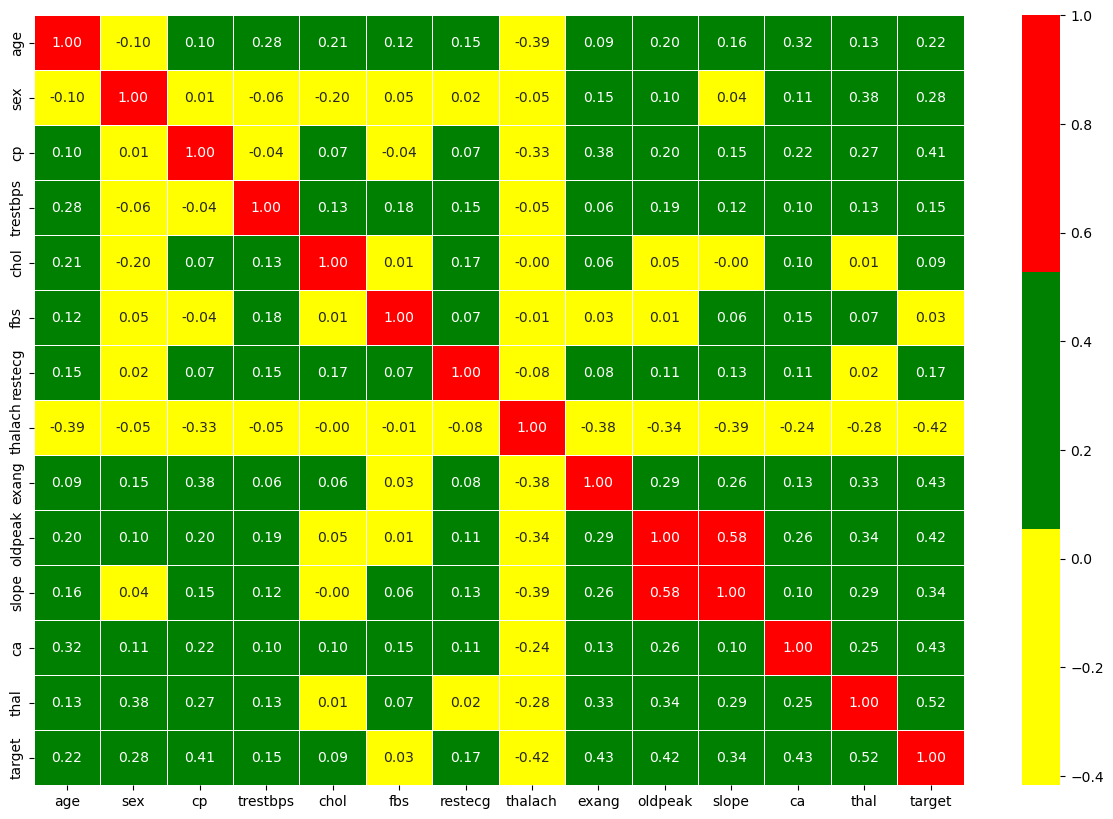

In [118]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap=['yellow', 'green', 'red'])

# ML Model

In [119]:
# Model Selection
X = df.drop('target', axis=1)
Y = df.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [120]:
X_train.shape, Y_train.shape

((242, 13), (242,))

In [121]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0
202,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0
196,69.0,1.0,1.0,160.0,234.0,1.0,2.0,131.0,0.0,0.1,2.0,1.0,3.0
75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0
176,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0


In [122]:
X_train.ca = X_train.ca.astype('float')
X_train.thal = X_train.thal.astype('float')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    float64
 1   sex       242 non-null    float64
 2   cp        242 non-null    float64
 3   trestbps  242 non-null    float64
 4   chol      242 non-null    float64
 5   fbs       242 non-null    float64
 6   restecg   242 non-null    float64
 7   thalach   242 non-null    float64
 8   exang     242 non-null    float64
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    float64
 11  ca        242 non-null    float64
 12  thal      242 non-null    float64
dtypes: float64(13)
memory usage: 26.5 KB


## LogR, KNN, RF

In [124]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Random Tree', RandomForestClassifier()))

In [125]:
model_scores = {}
for name, model in models:
    model.fit(X_train, Y_train)
    model_scores[name] = model.score(X_test, Y_test)
model_scores

c:\Users\PandiyaDS\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.8524590163934426,
 'KNN': 0.6885245901639344,
 'Random Tree': 0.8688524590163934}

<AxesSubplot:>

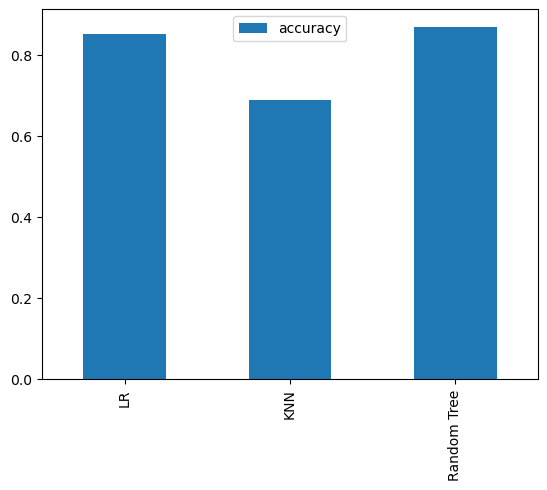

In [126]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

## KNN Train-Test Score

In [127]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

Maximum KNN Score on the test data: 72.13


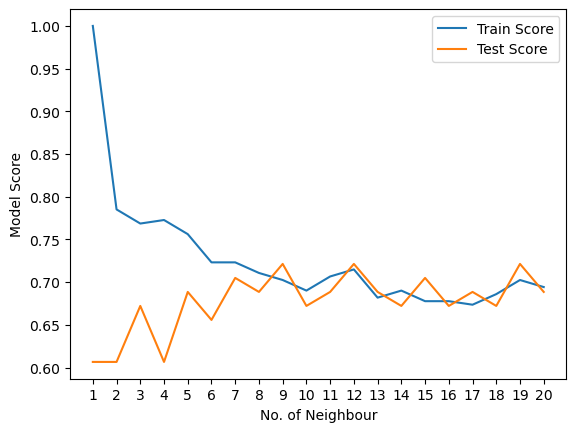

In [132]:
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.plot(neighbors, test_scores, label = 'Test Score')

plt.xticks(np.arange(1, 21, 1))
plt.xlabel('No. of Neighbour')
plt.ylabel('Model Score')
plt.legend()
print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}")

## RandomSearch for LogReg

In [134]:
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid,
                                cv=5, n_iter=20, verbose=True, scoring='accuracy')

rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   scoring='accuracy', verbose=True)

In [135]:
rs_log_reg.best_score_

0.8303571428571429

In [136]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [137]:
rs_log_reg.score(X_test, Y_test)

0.8688524590163934

## GridSearch for LogReg

In [143]:
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,
                                cv=5, verbose=True, scoring='accuracy')

gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=True)

In [144]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [145]:
gs_log_reg.best_score_

0.8303571428571429

In [146]:
gs_log_reg.score(X_test, Y_test)

0.8688524590163934

### Predict

In [150]:
Y_pred = gs_log_reg.predict(X_test)
Y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [152]:
Y_test.values

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

c:\Users\PandiyaDS\anaconda3\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


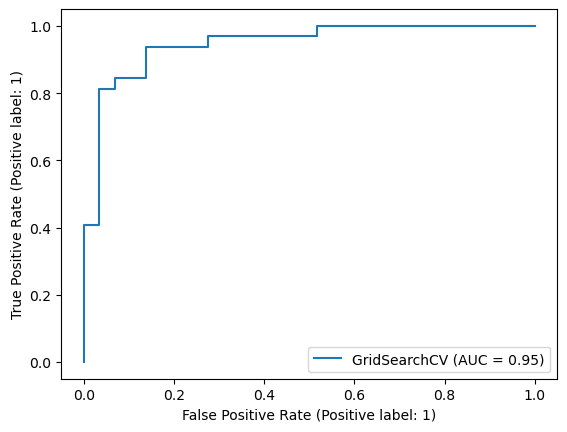

In [153]:
plot_roc_curve(gs_log_reg, X_test, Y_test)

In [154]:
print(confusion_matrix(Y_test, Y_pred))

[[26  3]
 [ 5 27]]


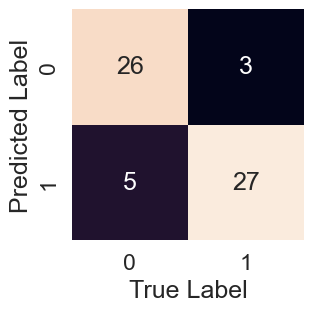

In [156]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, Y_pred):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_pred),
                     annot= True,
                     cbar = False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

plot_conf_mat(Y_test, Y_pred)

In [157]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## RandomSearch for RF

In [138]:
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth': [1, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,
                                cv=5, n_iter=20, verbose=True, scoring='accuracy')

rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [1, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   scoring='accuracy', verbose=True)

In [139]:
rs_rf.best_score_

0.8264455782312925

In [140]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 6,
 'min_samples_leaf': 19,
 'max_depth': 1}

In [141]:
rs_rf.score(X_test, Y_test)

0.9016393442622951

## GridSearch for RF

In [ ]:
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth': [1, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

rs_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid,
                                cv=5, verbose=True, scoring='accuracy')

rs_rf.fit(X_train, Y_train)

In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.best_score_

In [ ]:
rs_rf.score(X_test, Y_test)